In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import cv2

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [4]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

In [5]:
len(model.layers)

22

In [6]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [7]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [9]:
plant = 'Apple'
df = pd.read_csv('/content/drive/MyDrive/DATASET/Pixel_File_'+plant+'.csv')

In [12]:
df = df.sample(frac = 1)
df = df.reset_index()
df = df.drop(columns = ['Unnamed: 0','index'])

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,30,26,25,36,26,26,40,28,28,40,...,148,117,132,160,128,139,157,125,136,0
1,187,173,187,171,155,169,181,165,180,167,...,157,125,120,162,180,169,166,137,123,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,138,127,129,141,130,132,139,132,132,137,...,192,183,183,188,178,178,190,180,180,3
4,56,59,64,58,61,66,59,62,67,64,...,163,163,167,161,162,166,158,159,164,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9719,179,160,169,140,122,131,190,169,178,162,...,144,148,154,147,136,158,149,130,155,0
9720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9721,138,134,139,124,120,125,142,138,143,135,...,129,124,126,124,119,121,123,118,120,3


In [14]:
print(len(df))
y = df.label
x = df.drop(columns = ['label'])

9723


In [15]:
print(y)
print(x)

0       0
1       3
2       0
3       3
4       2
       ..
9718    0
9719    0
9720    0
9721    3
9722    3
Name: label, Length: 9723, dtype: int64
        0    1    2    3    4    5    6    7    8    9  ...  2342  2343  2344  \
0      30   26   25   36   26   26   40   28   28   40  ...    43   148   117   
1     187  173  187  171  155  169  181  165  180  167  ...   130   157   125   
2       0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
3     138  127  129  141  130  132  139  132  132  137  ...   179   192   183   
4      56   59   64   58   61   66   59   62   67   64  ...   163   163   163   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9718    0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
9719  179  160  169  140  122  131  190  169  178  162  ...   115   144   148   
9720    0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
9721  138  134  139  124  120  125  142 

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [17]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

In [28]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 30,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/30
92/92 [==============================] - ETA: 0s - loss: 0.2330 - accuracy: 0.9469

92/92 [==============================] - 9s 100ms/step - loss: 0.2330 - accuracy: 0.9469 - val_loss: 0.3335 - val_accuracy: 0.9110
Epoch 2/30
92/92 [==============================] - ETA: 0s - loss: 0.2304 - accuracy: 0.9478

92/92 [==============================] - 10s 108ms/step - loss: 0.2304 - accuracy: 0.9478 - val_loss: 0.3218 - val_accuracy: 0.9172
Epoch 3/30
92/92 [==============================] - ETA: 0s - loss: 0.2192 - accuracy: 0.9558

92/92 [==============================] - 10s 113ms/step - loss: 0.2192 - accuracy: 0.9558 - val_loss: 0.3224 - val_accuracy: 0.9110
Epoch 4/30
92/92 [==============================] - ETA: 0s - loss: 0.2128 - accuracy: 0.9534

92/92 [==============================] - 9s 100ms/step - loss: 0.2128 - accuracy: 0.9534 - val_loss: 0.3248 - val_accuracy: 0.9141
Epoch 5/30
92/92 [==============================] - ETA: 0s - loss: 0.2020 - accuracy: 0.9584

92/92 [==============================] - 10s 107ms/step - loss: 0.2020 - accuracy: 0.9584 - val_loss: 0.3232 - val_accuracy: 0.9126
Epoch 6/30
92/92 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9579

92/92 [==============================] - 11s 114ms/step - loss: 0.2021 - accuracy: 0.9579 - val_loss: 0.3130 - val_accuracy: 0.9172
Epoch 7/30
92/92 [==============================] - ETA: 0s - loss: 0.1963 - accuracy: 0.9611

92/92 [==============================] - 9s 101ms/step - loss: 0.1963 - accuracy: 0.9611 - val_loss: 0.3216 - val_accuracy: 0.9172
Epoch 8/30
92/92 [==============================] - ETA: 0s - loss: 0.1874 - accuracy: 0.9628

92/92 [==============================] - 10s 106ms/step - loss: 0.1874 - accuracy: 0.9628 - val_loss: 0.3115 - val_accuracy: 0.9248
Epoch 9/30
92/92 [==============================] - ETA: 0s - loss: 0.1780 - accuracy: 0.9638

92/92 [==============================] - 10s 113ms/step - loss: 0.1780 - accuracy: 0.9638 - val_loss: 0.3192 - val_accuracy: 0.9110
Epoch 10/30
92/92 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9655

92/92 [==============================] - 9s 101ms/step - loss: 0.1742 - accuracy: 0.9655 - val_loss: 0.3117 - val_accuracy: 0.9156
Epoch 11/30
92/92 [==============================] - ETA: 0s - loss: 0.1750 - accuracy: 0.9637

92/92 [==============================] - 10s 106ms/step - loss: 0.1750 - accuracy: 0.9637 - val_loss: 0.3157 - val_accuracy: 0.9080
Epoch 12/30
92/92 [==============================] - ETA: 0s - loss: 0.1645 - accuracy: 0.9661

92/92 [==============================] - 10s 114ms/step - loss: 0.1645 - accuracy: 0.9661 - val_loss: 0.3115 - val_accuracy: 0.9110
Epoch 13/30
92/92 [==============================] - ETA: 0s - loss: 0.1619 - accuracy: 0.9693

92/92 [==============================] - 10s 103ms/step - loss: 0.1619 - accuracy: 0.9693 - val_loss: 0.3090 - val_accuracy: 0.9141
Epoch 14/30
92/92 [==============================] - ETA: 0s - loss: 0.1637 - accuracy: 0.9693

92/92 [==============================] - 9s 102ms/step - loss: 0.1637 - accuracy: 0.9693 - val_loss: 0.3113 - val_accuracy: 0.9126
Epoch 15/30
92/92 [==============================] - ETA: 0s - loss: 0.1631 - accuracy: 0.9650

92/92 [==============================] - 10s 112ms/step - loss: 0.1631 - accuracy: 0.9650 - val_loss: 0.3018 - val_accuracy: 0.9172
Epoch 16/30
92/92 [==============================] - ETA: 0s - loss: 0.1654 - accuracy: 0.9676

92/92 [==============================] - 9s 100ms/step - loss: 0.1654 - accuracy: 0.9676 - val_loss: 0.3024 - val_accuracy: 0.9172
Epoch 17/30
92/92 [==============================] - ETA: 0s - loss: 0.1491 - accuracy: 0.9712

92/92 [==============================] - 10s 105ms/step - loss: 0.1491 - accuracy: 0.9712 - val_loss: 0.3043 - val_accuracy: 0.9172
Epoch 18/30
92/92 [==============================] - ETA: 0s - loss: 0.1466 - accuracy: 0.9705

92/92 [==============================] - 10s 112ms/step - loss: 0.1466 - accuracy: 0.9705 - val_loss: 0.3003 - val_accuracy: 0.9202
Epoch 19/30
92/92 [==============================] - ETA: 0s - loss: 0.1420 - accuracy: 0.9722

92/92 [==============================] - 9s 102ms/step - loss: 0.1420 - accuracy: 0.9722 - val_loss: 0.2982 - val_accuracy: 0.9202
Epoch 20/30
92/92 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9720

92/92 [==============================] - 10s 104ms/step - loss: 0.1408 - accuracy: 0.9720 - val_loss: 0.2985 - val_accuracy: 0.9172
Epoch 21/30
92/92 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9664

92/92 [==============================] - 10s 112ms/step - loss: 0.1455 - accuracy: 0.9664 - val_loss: 0.2935 - val_accuracy: 0.9233
Epoch 22/30
92/92 [==============================] - ETA: 0s - loss: 0.1336 - accuracy: 0.9741

92/92 [==============================] - 9s 100ms/step - loss: 0.1336 - accuracy: 0.9741 - val_loss: 0.2906 - val_accuracy: 0.9218
Epoch 23/30
92/92 [==============================] - ETA: 0s - loss: 0.1374 - accuracy: 0.9720

92/92 [==============================] - 10s 104ms/step - loss: 0.1374 - accuracy: 0.9720 - val_loss: 0.2890 - val_accuracy: 0.9279
Epoch 24/30
92/92 [==============================] - ETA: 0s - loss: 0.1356 - accuracy: 0.9734

92/92 [==============================] - 10s 113ms/step - loss: 0.1356 - accuracy: 0.9734 - val_loss: 0.2966 - val_accuracy: 0.9156
Epoch 25/30
92/92 [==============================] - ETA: 0s - loss: 0.1398 - accuracy: 0.9708

92/92 [==============================] - 9s 103ms/step - loss: 0.1398 - accuracy: 0.9708 - val_loss: 0.2944 - val_accuracy: 0.9156
Epoch 26/30
92/92 [==============================] - ETA: 0s - loss: 0.1303 - accuracy: 0.9756

92/92 [==============================] - 10s 105ms/step - loss: 0.1303 - accuracy: 0.9756 - val_loss: 0.2917 - val_accuracy: 0.9248
Epoch 27/30
92/92 [==============================] - ETA: 0s - loss: 0.1203 - accuracy: 0.9765

92/92 [==============================] - 11s 115ms/step - loss: 0.1203 - accuracy: 0.9765 - val_loss: 0.2965 - val_accuracy: 0.9202
Epoch 28/30
92/92 [==============================] - ETA: 0s - loss: 0.1204 - accuracy: 0.9761

92/92 [==============================] - 10s 106ms/step - loss: 0.1204 - accuracy: 0.9761 - val_loss: 0.2926 - val_accuracy: 0.9218
Epoch 29/30
92/92 [==============================] - ETA: 0s - loss: 0.1136 - accuracy: 0.9792

92/92 [==============================] - 9s 101ms/step - loss: 0.1136 - accuracy: 0.9792 - val_loss: 0.2922 - val_accuracy: 0.9264
Epoch 30/30
92/92 [==============================] - ETA: 0s - loss: 0.1116 - accuracy: 0.9794

92/92 [==============================] - 10s 114ms/step - loss: 0.1116 - accuracy: 0.9794 - val_loss: 0.2894 - val_accuracy: 0.9325
Duration: 0:04:54.578915


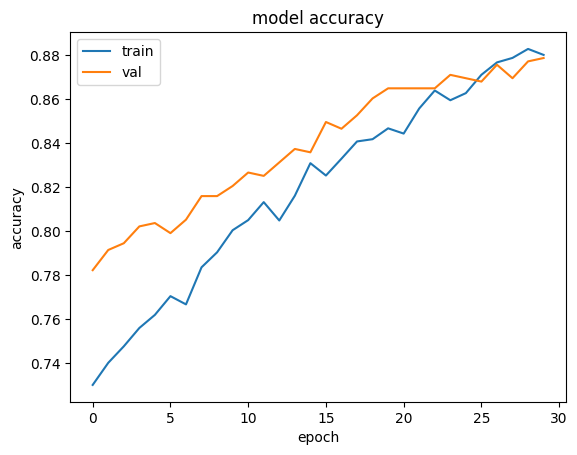

val 0.8788343667984009
min val 0.7822085618972778
acc 0.8829751014709473
mean val 0.8389059225718181


In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])


plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [22]:
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

201/201 [==============================] - 1s 7ms/step


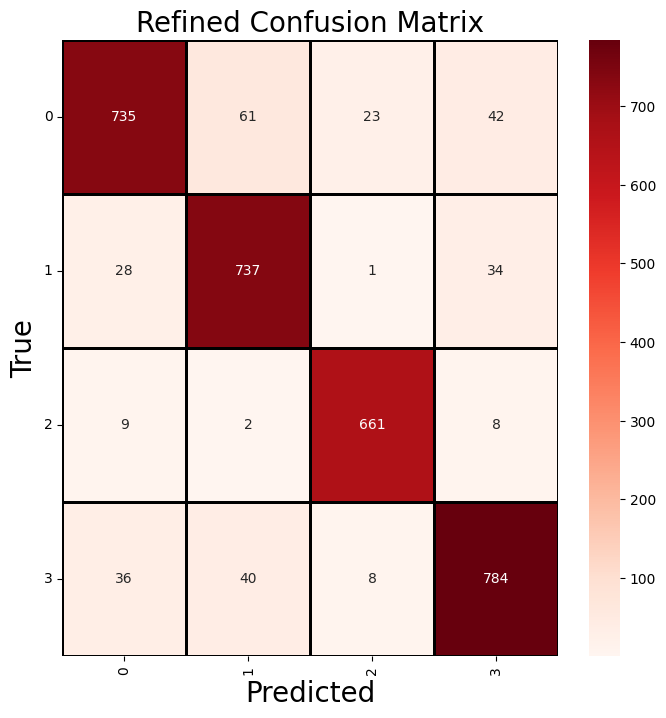

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Pred = model.predict(x_test, batch_size=16)
Pred_Label = np.argmax(Pred, axis=1)
ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0,1,2,3])
cm = ConfusionM
targetnames = [0,1,2,3]
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

(3209,)
ROC AUC score: 0.9409764027808826


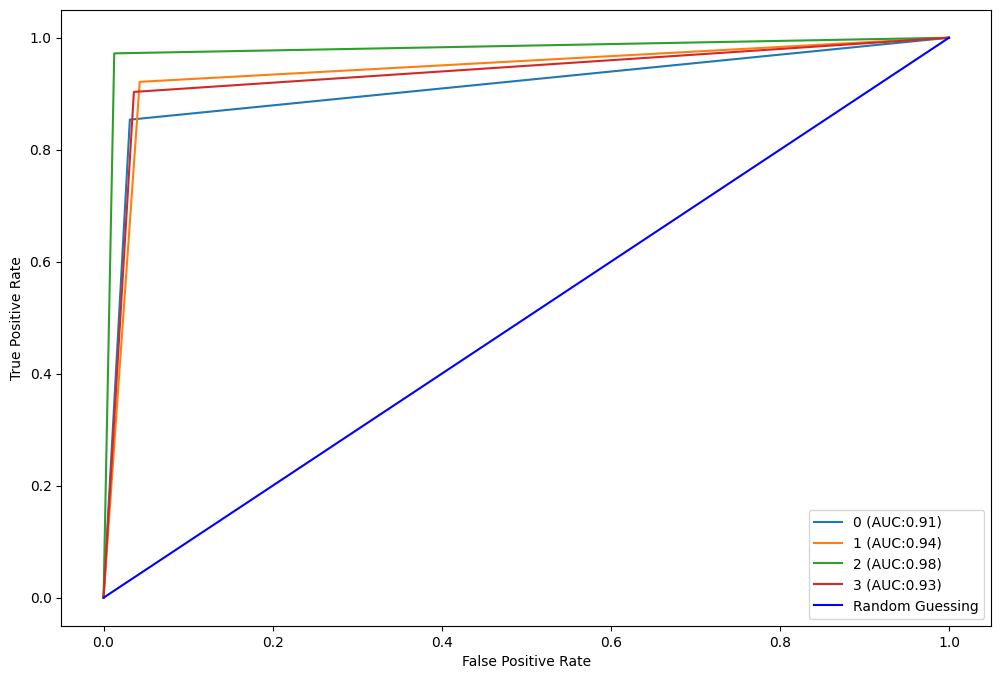

In [30]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= [0,1,2,3]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    print(y_test.shape)
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)



print('ROC AUC score:', multiclass_roc_auc_score(y_test, Pred_Label))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


In [31]:
from sklearn.metrics import classification_report
targetnames = [0,1,2,3]
tar = []
for i in targetnames:
  tar.append(str(i))
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1, 2, 3], target_names=tar)

In [32]:
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       861
           1       0.88      0.92      0.90       800
           2       0.95      0.97      0.96       680
           3       0.90      0.90      0.90       868

    accuracy                           0.91      3209
   macro avg       0.91      0.91      0.91      3209
weighted avg       0.91      0.91      0.91      3209



In [37]:
model.save_weights('/content/drive/MyDrive/MODELS/Apple/cnn_model_weights.h5')

In [36]:
model.save('/content/drive/MyDrive/MODELS/Apple/cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
